In [65]:
"""
    Package Installation
"""
__author__ = "SakibApon"
__email__ = "sakibapon7@gmail.com"


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import re
import json
import os 
import tensorflow as tf
import sklearn
from joblib import dump, load
import seaborn as sbs
import sklearn.naive_bayes 
import sklearn.model_selection
import sklearn.metrics
import matplotlib.pyplot as plt
from numpy import argmax
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, plot_confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sarcasmdetectionprocessed/SarcasmDetectionProcessed.csv
/kaggle/input/sarcasmcombined4k/CombinedSarcasm.csv
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


In [2]:
df = pd.read_csv('../input/sarcasmcombined4k/CombinedSarcasm.csv')
df

,Comments,Label
0,আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...,1.0
1,আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...,1.0
2,বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...,1.0
3,"হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ",1.0
4,থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন,1.0
...,...,...
3458,"তোমার কথাগুলো শুনে,,আমি অনেক কেদেছি কারন আমার ...",0.0
3459,আমি সদ্য 2 মাস হয় আমার বাবা কে হারাইছে বোন এট...,0.0
3460,বাবা মানেই অমূল্য রত্ন,0.0
3461,বাবা অপূর্ণতা কি তা এখন বুঝতে পারি..!,0.0


In [3]:
#Empty Comments Removing
l = [2363, 2366, 2373, 2375, 2380, 2390, 2392, 2402, 2404, 2412, 2416, 2985]
for i in l:
    if (df['Comments'][i]):
        df = df.drop(i)
        
df.reset_index(drop=True, inplace=True)
print(len(df))

#Empty Label Removing & FLoat to Int
for i in range(len(df)):
    try:
        df['Label'][i] = int(df['Label'][i])
    except: 
        df['Label'][i] = int(0)
        
df['Label'] = df['Label'].astype(int)
df

3451


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Comments,Label
0,আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...,1
1,আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...,1
2,বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...,1
3,"হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ",1
4,থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন,1
...,...,...
3446,"তোমার কথাগুলো শুনে,,আমি অনেক কেদেছি কারন আমার ...",0
3447,আমি সদ্য 2 মাস হয় আমার বাবা কে হারাইছে বোন এট...,0
3448,বাবা মানেই অমূল্য রত্ন,0
3449,বাবা অপূর্ণতা কি তা এখন বুঝতে পারি..!,0


Now check the distribution (ratio) of our target `is_sarcastic`.

In [4]:
df.to_csv('ProcessedSarcasm.csv', encoding='utf-8', index=False)

In [5]:
df.Label.value_counts(normalize=True), df.Label.value_counts()

(1    0.565923
 0    0.434077
 Name: Label, dtype: float64,
 1    1953
 0    1498
 Name: Label, dtype: int64)

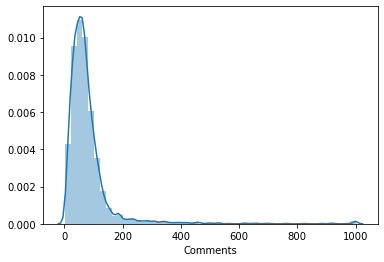

In [6]:
# A birdview of headline length. Seems the majority has a length of 70, that's about 5 to 15 words, which makes sence.
sbs.distplot(df.Comments.str.len())

In [7]:
df.describe(include='all')

,Comments,Label
count,3451,3451.000000
unique,3158,NaN
top,"আমি এখনই ব্যস্ত, আমি কি আপনাকে অন্য কোনও সময় ...",NaN
freq,8,NaN
mean,NaN,0.565923
std,NaN,0.495707
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


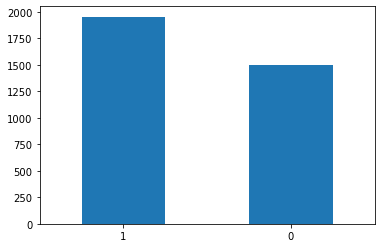

In [8]:
df['Label'].value_counts().plot(kind="bar", rot=0)

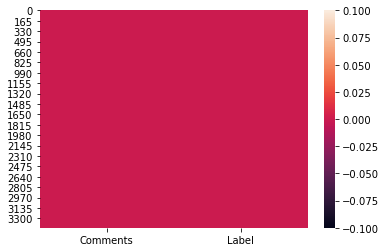

In [9]:
import seaborn as sns
sns.heatmap(df.isnull())

## Bangla Preprocessing**

In [10]:
def clean_sentence(sent):

    sent = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent) 
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)
    
    sent = sent.strip()
    return sent

In [11]:
df.loc[65,'Comments']

'“আমার নীরবতার অর্থ এই নয় যে আমি আপনার সাথে একমত।এটা ঠিক যে আপনার অজ্ঞতার স্তরটি আমাকে নির্বাক করে দিয়েছে ”"'

In [12]:
for i, sent  in enumerate(df['Comments'].tolist()):
    df.loc[i,'clean_Comments'] = clean_sentence(sent)

In [13]:
test = df.loc[15,'clean_Comments']
test

'বোকামির বিরুদ্ধে সার্কাসম হল দেহের প্রাকৃতিক প্রতিরক্ষা'

In [14]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

In [15]:
stop_words = {'এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য'}

def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [16]:
t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor :', test)
print('after :', r_word)

befor : বোকামির বিরুদ্ধে সার্কাসম হল দেহের প্রাকৃতিক প্রতিরক্ষা
after : বোকামির সার্কাসম হল দেহের প্রাকৃতিক প্রতিরক্ষা


In [17]:
df['Comments'] = [remove_stop_words(tokenized_data(sent)) for sent in df['Comments'].tolist()]
#del df['sentence']
df.to_csv('clean_data.csv', encoding='utf-8', index=False)

In [22]:
"""from sklearn.feature_extraction.text import CountVectorizer
stpGram = {}
word_vectorizerGram = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)


word_vectorizerGram.fit_transform(df['clean_Comments'])
stpGram = word_vectorizerGram.get_feature_names()

print(len(stpGram))


word_vectorizerGram_rsw = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)

word_vectorizerGram_rsw.fit_transform(df['clean_Comments'])
stpGram_rsw = word_vectorizerGram_rsw.get_feature_names()

print(len(stpGram_rsw))
print('sample of bigram : ',stpGram_rsw[20])


def sentence_to_vector_transform(line, stpGram):
    vec = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False, token_pattern=u'[\S]+',
                            tokenizer=None, vocabulary=stpGram)
    tList = []
    tList.append(line)
    sent = vec.transform(tList)
    sent = sent.toarray()
    sent = np.squeeze(np.asarray(sent))
    return sent
"""

40193
sample of bigram :  অংশটি কেবল


The data is well-balanced, which is rare in reality but great for our practicing purpose.

Now we will try Naive Bayes as our base model.

## Building Base Model: Naive Bayes
First step, we should tokenize texts into vectors.

In [18]:
df.head()

,Comments,Label,clean_Comments
0,মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা বোবা...,1,আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...
1,যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি কোনও...,1,আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...
2,বাহ ... দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষী সা...,1,বাহ আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষী সা...
3,"হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ",1,হাহ মজার বিষয়আনোয়েড গ্রুআপ
4,থান্ডার 830 জেগে উঠলে ভালবাসুন,1,থান্ডার আমাকে এ জেগে উঠলে এটি ভালবাসুন


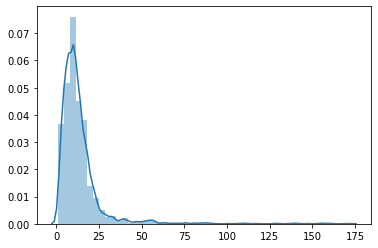

In [19]:
vocab_size = 10000 # max_features 
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df.clean_Comments)
train_inputs = tokenizer.texts_to_sequences(df.clean_Comments)
sbs.distplot([len(l) for l in train_inputs])

See, the above graph confirms our guess: most headline has 5 - 15 words. 


In [74]:
train_inputs = tf.keras.preprocessing.sequence.pad_sequences(train_inputs, padding='post', maxlen=20)
train_labels = df['Label']
score = []
# Split data into train /validation 
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(train_inputs, train_labels, test_size=0.2, random_state=0)
train_inputs[0]

array([   1,   31,   18,   33, 2407,  670, 2408, 1170, 1170,  562,   57,
         12,   12,   71,   71,   80,    0,    0,    0,    0], dtype=int32)

In [68]:
nb = sklearn.naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
y_preds = nb.predict(X_val)
print(f"Accuracy score", sklearn.metrics.accuracy_score(y_val, y_preds))
print(f"Classification report\n", sklearn.metrics.classification_report(y_val, y_preds))

Accuracy score 0.6063675832127352
Classification report
               precision    recall  f1-score   support

           0       0.54      0.53      0.53       295
           1       0.65      0.66      0.66       396

    accuracy                           0.61       691
   macro avg       0.60      0.60      0.60       691
weighted avg       0.61      0.61      0.61       691



In [72]:
from sklearn.ensemble import GradientBoostingClassifier
#GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=5, random_state=42)
grad.fit(X_train, y_train)
GRADIENT_score = round((grad.score(X_val, y_val)*100),2)
#score.append(["Gradient Boosting", GRADIENT_score])
print("Gradient Boosting Classifier Accuracy: {}%".format(GRADIENT_score))
print(f"Accuracy score", sklearn.metrics.accuracy_score(y_val, y_preds))
print(f"Classification report\n", sklearn.metrics.classification_report(y_val, y_preds))

# save the model to disk
dump(grad, 'Gradient{}.joblib') 

Gradient Boosting Classifier Accuracy: 80.03%
Accuracy score 0.6063675832127352
Classification report
               precision    recall  f1-score   support

           0       0.54      0.53      0.53       295
           1       0.65      0.66      0.66       396

    accuracy                           0.61       691
   macro avg       0.60      0.60      0.60       691
weighted avg       0.61      0.61      0.61       691



['Gradient{}.joblib']

In [ ]:
from sklearn.naive_bayes import GaussianNB
#GradientBoostingClassifier
gnb  = GaussianNB(n_estimators=5, random_state=42)
gnb .fit(X_train, y_train)
GRADIENT_score = round((gnb .score(X_val, y_val)*100),2)
#score.append(["Gradient Boosting", GRADIENT_score])
print("Gradient Boosting Classifier Accuracy: {}%".format(GRADIENT_score))
print(f"Accuracy score", sklearn.metrics.accuracy_score(y_val, y_preds))
print(f"Classification report\n", sklearn.metrics.classification_report(y_val, y_preds))

# save the model to disk
dump(gnb , 'Gradient{}.joblib') 

In [ ]:
"""from sklearn.svm import SVC
C = 1.0  # SVM regularization parameter
linear_svc = SVC(kernel='linear', C=C)
linear_svc = linear_svc.fit(X_train, y_train)
y_preds = linear_svc.predict(X_val)

print(f"Accuracy score", sklearn.metrics.accuracy_score(y_val, y_preds))
print(f"Classification report\n", sklearn.metrics.classification_report(y_val, y_preds))"""

In [61]:
def Accloss(param):
    plt.plot(history.history[param])
    plt.plot(history.history['val_{}'.format(param)])
    plt.title('Model {}'.format(param))
    plt.ylabel(param)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
def ReportMatrix(model):
    modelPred = argmax(model.predict(X_val),axis=1)

    #Classification Report 
    y_true = y_val
    y_pred = modelPred
    target_names = ['class 0', 'class 1']
    print(classification_report(y_true, y_pred, target_names=target_names))

    #Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    f = sns.heatmap(cm, annot=True, fmt='d')
    
def roc():
    y_prob = model.predict(X_val) 
    y_pred_prob = y_prob.argmax(axis=-1)

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

# Another model: Keras LSTM

In [23]:
max_len = 20
text_input = tf.keras.Input(shape=(max_len, ))
embed_text = tf.keras.layers.Embedding(vocab_size, 128)(text_input)

net = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))(embed_text)
net = tf.keras.layers.GlobalMaxPool1D()(net)
net = tf.keras.layers.Dense(64, activation='relu')(net)
net = tf.keras.layers.Dropout(0.4)(net)
net = tf.keras.layers.Dense(32, activation='relu')(net)
net = tf.keras.layers.Dropout(0.4)(net)

output = tf.keras.layers.Dense(1, activation='sigmoid')(net)
model = tf.keras.models.Model(text_input, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 20, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 20, 64)            41216     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080  

In [26]:
metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)

mc = tf.keras.callbacks.ModelCheckpoint('model_best.hdf5', monitor='val_accuracy',   verbose=1, save_best_only=True, mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.2, min_lr=0.0002)
    
callbacks = [mc, es, learning_rate_reduction]

history = model.fit(X_train, y_train,  epochs=100, batch_size=256, callbacks=callbacks, validation_split=0.2, verbose=1)

Train on 2208 samples, validate on 552 samples
Epoch 1/100
1536/2208 [===================>..........] - ETA: 2s - loss: 0.6928 - accuracy: 0.5215 - precision_1: 0.5864 - recall_1: 0.4660 - auc_1: 0.5288 
Epoch 00001: val_accuracy improved from -inf to 0.59058, saving model to model_best.hdf5
2208/2208 [==============================] - 6s 3ms/sample - loss: 0.6917 - accuracy: 0.5525 - precision_1: 0.6102 - recall_1: 0.5888 - auc_1: 0.5615 - val_loss: 0.6878 - val_accuracy: 0.5906 - val_precision_1: 0.5725 - val_recall_1: 0.9934 - val_auc_1: 0.7532
Epoch 2/100
1792/2208 [=======================>......] - ETA: 0s - loss: 0.6832 - accuracy: 0.6602 - precision_1: 0.6427 - recall_1: 0.9047 - auc_1: 0.7145
Epoch 00002: val_accuracy improved from 0.59058 to 0.76087, saving model to model_best.hdf5
2208/2208 [==============================] - 0s 131us/sample - loss: 0.6816 - accuracy: 0.6689 - precision_1: 0.6513 - recall_1: 0.8988 - auc_1: 0.7199 - val_loss: 0.6702 - val_accuracy: 0.7609 - va

In [27]:
model = tf.keras.models.load_model('model_best.hdf5')
y_preds = model.predict(X_val, batch_size=1024).round().astype(int)
print("Test accracy score", sklearn.metrics.accuracy_score(y_val, y_preds))

Test accracy score 0.9421128798842258


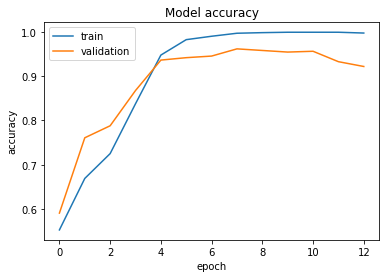

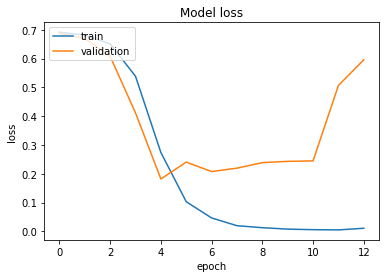

              precision    recall  f1-score   support

     class 0       0.43      1.00      0.60       295
     class 1       0.00      0.00      0.00       396

    accuracy                           0.43       691
   macro avg       0.21      0.50      0.30       691
weighted avg       0.18      0.43      0.26       691



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


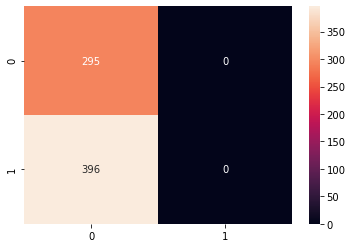

In [28]:
Accloss('accuracy')
Accloss('loss')
ReportMatrix(model)

In [29]:
%%time
import gensim.downloader as api

def embed_word_vector(word_index, pretrained='word2vec-google-news-300'):
    embed_size = 300 # Google news vector is 300-dimensional
    vector = api.load(pretrained)
    zeros = [0] * embed_size
    matrix = np.zeros((vocab_size, embed_size)) 
    
    for word, i in word_index.items():
        if i >= vocab_size or word not in vector: continue 
        matrix[i] = vector[word]
    
    print("Embed word vector completed.")
    return matrix

CPU times: user 62.7 ms, sys: 14.5 ms, total: 77.2 ms
Wall time: 173 ms


In [30]:
%%time
pretrained = 'glove-wiki-gigaword-300'
matrix = embed_word_vector(tokenizer.word_index, pretrained=pretrained)

[=========================-------------------------] 51.4% 193.4/376.1MB downloadedEmbed word vector completed.
CPU times: user 4min 1s, sys: 8.18 s, total: 4min 9s
Wall time: 4min 14s


In [31]:
max_len = 20
text_input = tf.keras.Input(shape=(max_len, ))
embed_text = tf.keras.layers.Embedding(vocab_size, 300, weights=[matrix], trainable=False)(text_input)

net = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True))(embed_text)
net = tf.keras.layers.GlobalMaxPool1D()(net)
net = tf.keras.layers.Dense(64, activation='relu')(net)
net = tf.keras.layers.Dropout(0.4)(net)
net = tf.keras.layers.Dense(32, activation='relu')(net)
net = tf.keras.layers.Dropout(0.4)(net)

output = tf.keras.layers.Dense(1, activation='sigmoid')(net)
model = tf.keras.models.Model(text_input, output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 20, 300)           3000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20, 256)           330240    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080

In [32]:
metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)

mc = tf.keras.callbacks.ModelCheckpoint('model_best_embed.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.2, min_lr=0.0002)
    
callbacks = [mc, es, learning_rate_reduction]

history = model.fit(X_train, y_train, epochs=50, batch_size=256, callbacks=callbacks, validation_split=0.2, verbose=1)

Train on 2208 samples, validate on 552 samples
Epoch 1/50
1536/2208 [===================>..........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5684 - precision_2: 0.5875 - recall_2: 0.8454 - auc_2: 0.5187         
Epoch 00001: val_accuracy improved from -inf to 0.54710, saving model to model_best_embed.hdf5
2208/2208 [==============================] - 3s 2ms/sample - loss: 0.6912 - accuracy: 0.5625 - precision_2: 0.5742 - recall_2: 0.8908 - auc_2: 0.5004 - val_loss: 0.6899 - val_accuracy: 0.5471 - val_precision_2: 0.5471 - val_recall_2: 1.0000 - val_auc_2: 0.4993
Epoch 2/50
1536/2208 [===================>..........] - ETA: 0s - loss: 0.6879 - accuracy: 0.5645 - precision_2: 0.5645 - recall_2: 1.0000 - auc_2: 0.4806
Epoch 00002: val_accuracy did not improve from 0.54710
2208/2208 [==============================] - 0s 57us/sample - loss: 0.6865 - accuracy: 0.5684 - precision_2: 0.5684 - recall_2: 1.0000 - auc_2: 0.4932 - val_loss: 0.6891 - val_accuracy: 0.5471 - val_precision_2: 0.5471 - va

In [33]:
model = tf.keras.models.load_model('model_best_embed.hdf5')
y_preds = model.predict(X_val, batch_size=1024).round().astype(int)
print("Test accracy score", sklearn.metrics.accuracy_score(y_val, y_preds))

Test accracy score 0.573082489146165


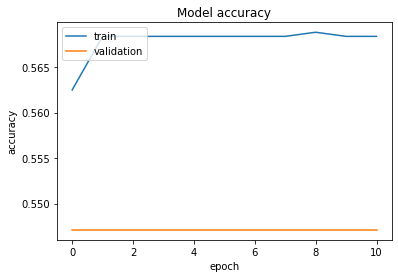

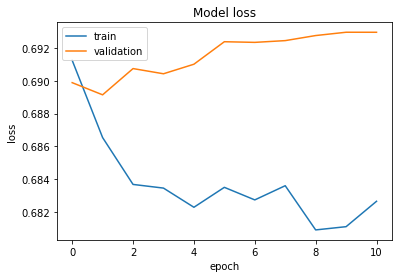

              precision    recall  f1-score   support

     class 0       0.43      1.00      0.60       295
     class 1       0.00      0.00      0.00       396

    accuracy                           0.43       691
   macro avg       0.21      0.50      0.30       691
weighted avg       0.18      0.43      0.26       691



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


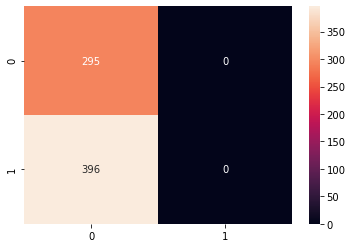

In [34]:
Accloss('accuracy')
Accloss('loss')
ReportMatrix(model)

# BERT, NLP text classification killer

In [35]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [36]:
!pip install tokenization

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [38]:
!pip install bert-tensorflow==1.0.1

     |████████████████████████████████| 67 kB 818 kB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [39]:
%%time
import tensorflow_hub as hub 
#import tokenization
from bert import tokenization
module_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(module_url, trainable=True)

CPU times: user 8.17 s, sys: 1.21 s, total: 9.38 s
Wall time: 10 s


In [42]:
import tensorflow as tf
tf.gfile = tf.io.gfile

In [43]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [48]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

def build_model(bert_layer, max_len=512):
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    net = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Dense(32, activation='relu')(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    out = tf.keras.layers.Dense(1, activation='sigmoid')(net)
    
    model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
    
    model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='binary_crossentropy', metrics=metrics)
    
    return model

In [49]:
import sys
from absl import flags
sys.argv=['preserve_unused_tokens=False']
flags.FLAGS(sys.argv)

['preserve_unused_tokens=False']

Remember in previous sections, we have explored on the headline length. Most of them has a length between 50 to 150, and the majority has a length of 70. We set the length to 120.

In [50]:
max_len = 100
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(df.clean_Comments, df['Label'],test_size=0.1, random_state=0)
X_train = bert_encode(X_train, tokenizer, max_len=max_len)
X_val = bert_encode(X_val, tokenizer, max_len=max_len)

Let's build the model and train on it.

In [51]:
model = build_model(bert_layer, max_len=max_len)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 100)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 100)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

In [52]:
%%time
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.2, min_lr=0.0002)
    
callbacks = [checkpoint, earlystopping, learning_rate_reduction]


train_history = model.fit(  X_train, y_train,  validation_split=0.1, epochs=3, callbacks=callbacks,  batch_size=16, verbose=1)

Train on 2794 samples, validate on 311 samples
Epoch 1/3
2784/2794 [============================>.] - ETA: 0s - loss: 0.5905 - accuracy: 0.6950 - precision_3: 0.7208 - recall_3: 0.7551 - auc_3: 0.7440
Epoch 00001: val_accuracy improved from -inf to 0.77492, saving model to model.h5
2794/2794 [==============================] - 54s 19ms/sample - loss: 0.5898 - accuracy: 0.6958 - precision_3: 0.7211 - recall_3: 0.7557 - auc_3: 0.7450 - val_loss: 0.4571 - val_accuracy: 0.7749 - val_precision_3: 0.7097 - val_recall_3: 0.9565 - val_auc_3: 0.9319
Epoch 2/3
2784/2794 [============================>.] - ETA: 0s - loss: 0.3938 - accuracy: 0.8355 - precision_3: 0.8779 - recall_3: 0.8245 - auc_3: 0.9007
Epoch 00002: val_accuracy improved from 0.77492 to 0.88103, saving model to model.h5
2794/2794 [==============================] - 40s 14ms/sample - loss: 0.3941 - accuracy: 0.8354 - precision_3: 0.8777 - recall_3: 0.8245 - auc_3: 0.9007 - val_loss: 0.3453 - val_accuracy: 0.8810 - val_precision_3: 0.

In [53]:
%%time
model.load_weights('model.h5')
y_preds = model.predict(X_val).round().astype(int)
print("Validation accuracy: ", sklearn.metrics.accuracy_score(y_val, y_preds))

Validation accuracy:  0.8959537572254336
CPU times: user 2.15 s, sys: 151 ms, total: 2.3 s
Wall time: 2.29 s


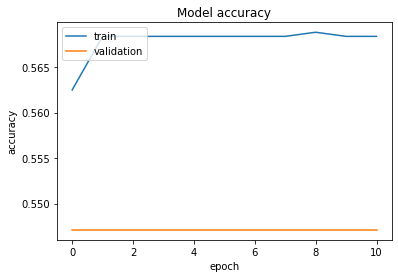

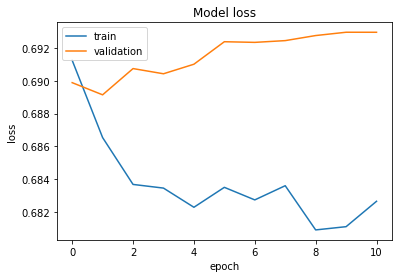

              precision    recall  f1-score   support

     class 0       0.40      1.00      0.57       138
     class 1       0.00      0.00      0.00       208

    accuracy                           0.40       346
   macro avg       0.20      0.50      0.29       346
weighted avg       0.16      0.40      0.23       346



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


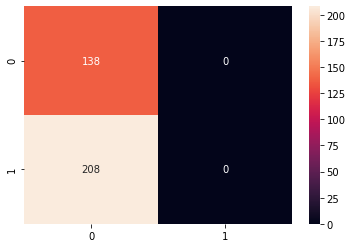

In [54]:
Accloss('accuracy')
Accloss('loss')
ReportMatrix(model)

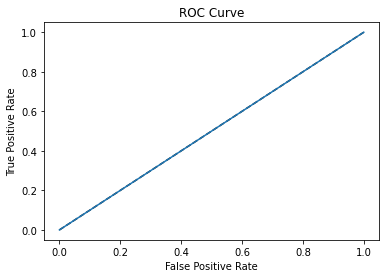

In [60]:
roc()